# Datenvisualisierung in Python

## Laden der erforderlichen Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter

## Import des Datensatzes

Die folgenden Übungen basieren auf den Ausgaben des Bundes für den
Zeitraum von 1990 bis 2027.

In [52]:
df_bundesfinanzen = pd.read_csv('./data/240627_bundesausgaben_timeline.csv')
print(df_bundesfinanzen.head())

   Jahr  Bildung und Forschung  Finanzen und Steuern    Sicherheit  \
0  1990           2.915631e+09          4.284407e+09  6.232319e+09   
1  1991           3.196256e+09          4.556436e+09  6.403684e+09   
2  1992           3.463842e+09          5.520356e+09  6.469725e+09   
3  1993           3.588631e+09          5.211826e+09  5.989260e+09   
4  1994           3.708234e+09          6.271460e+09  6.180145e+09   

   Soziale Wohlfahrt       Verkehr  
0       6.875148e+09  4.626737e+09  
1       8.091567e+09  5.372566e+09  
2       8.615627e+09  5.541553e+09  
3       1.129834e+10  6.127085e+09  
4       1.069757e+10  6.044093e+09  


## Teile eines Ganzen

* Kuchen
* Tree Map
* Horizontale (sortierte) Balken


### Pie Chart

#### Extraktion der erforderlichen Daten

In [53]:
y2023 = df_bundesfinanzen.iloc[37].tolist()
print(f'Rohdaten 2023: {y2023}')
y2023 = y2023[1:]
print(f'Bereinigte Daten 2023: {y2023}')

Rohdaten 2023: [2027.0, 8956911319.0, 15232713500.0, 7805770939.0, 31557075777.0, 11376824643.0]
Bereinigte Daten 2023: [8956911319.0, 15232713500.0, 7805770939.0, 31557075777.0, 11376824643.0]


#### Darstellung der Daten

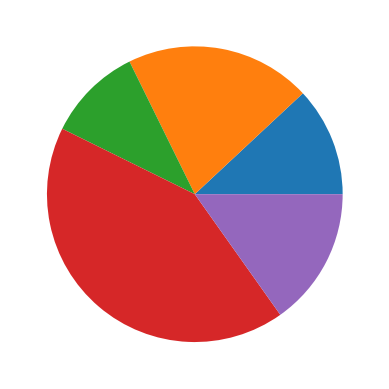

In [54]:
plt.pie(y2023)
plt.show()

In [75]:
# Aufbereitung der Beschriftung
labels = df_bundesfinanzen.columns.tolist()
print(f'Unbereinigte Labels: {labels}')
labels = labels[1:]
print(f'bereinigte Labels: {labels}')

Unbereinigte Labels: ['Jahr', 'Bildung und Forschung', 'Finanzen und Steuern', 'Sicherheit', 'Soziale Wohlfahrt', 'Verkehr', 'Total', 'Bildung%', 'Finanzen%', 'Sicherheit%', 'Soziales%', 'Verkehr%']
bereinigte Labels: ['Bildung und Forschung', 'Finanzen und Steuern', 'Sicherheit', 'Soziale Wohlfahrt', 'Verkehr', 'Total', 'Bildung%', 'Finanzen%', 'Sicherheit%', 'Soziales%', 'Verkehr%']


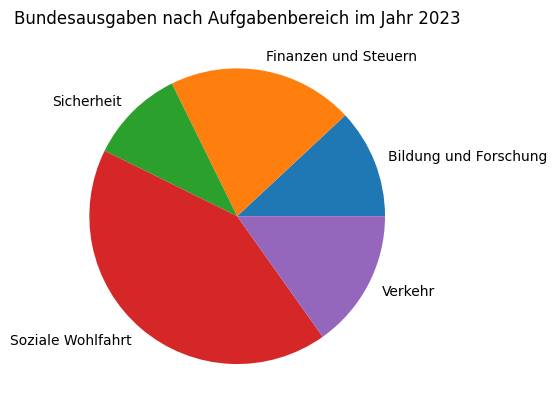

In [56]:
plt.pie(y2023, labels=labels)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

#### Farben

[Color Names](https://xkcd.com/color/rgb/)

In [57]:
colors = ['purple', 'green', 'blue', 'pink', 'red']

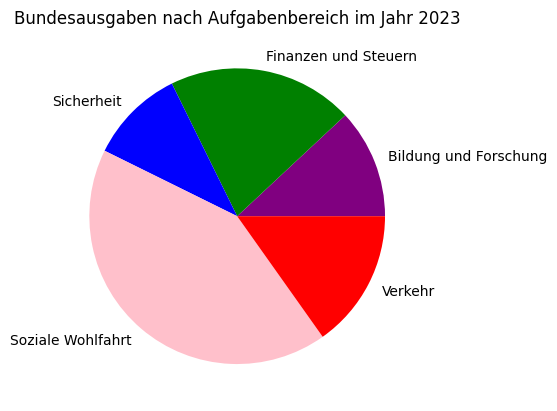

In [58]:
plt.pie(y2023, labels=labels, colors=colors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

### Tree Map

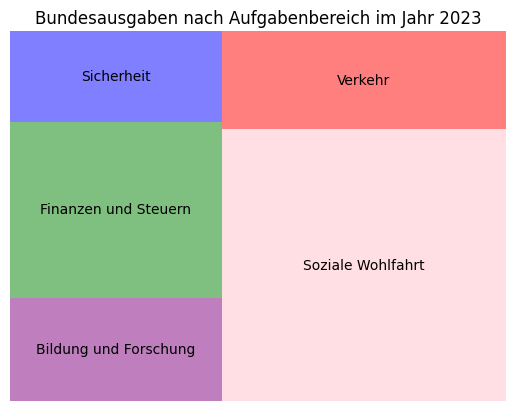

In [59]:
squarify.plot(sizes=y2023, label=labels, color=colors, alpha=0.5)
plt.axis('off')
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

#### Bar Chart

In [60]:
df = pd.DataFrame({
    'spendings':y2023,
    'labels': labels})

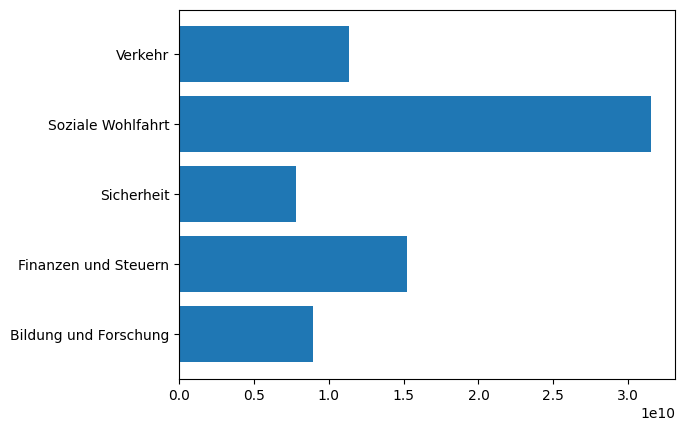

In [61]:
plt.barh(y=df.labels, width=df.spendings)
plt.show()

In [62]:
df = df.sort_values('spendings', ascending=True)
# Die Schichtung erfolgt von unten nach oben

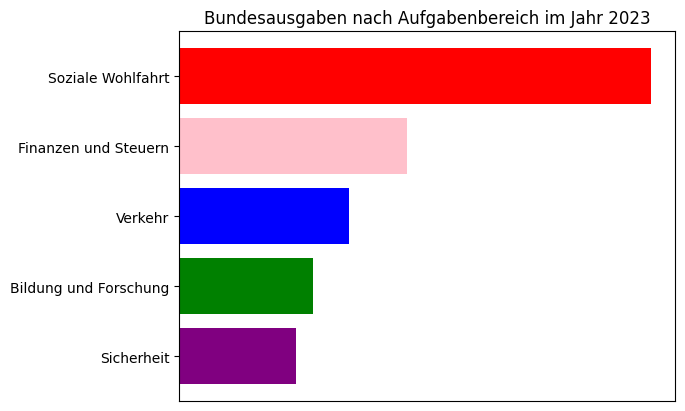

In [63]:
plt.barh(y=df.labels, width=df.spendings, color=colors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

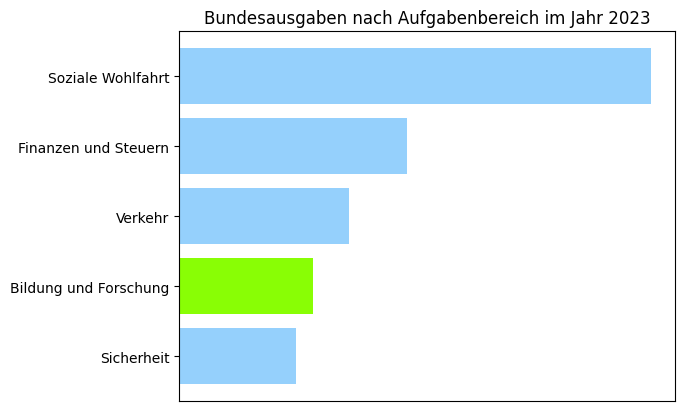

In [64]:
barcolors = ['#95d0fc', '#89fe05', '#95d0fc', '#95d0fc', '#95d0fc',]
plt.barh(y=df.labels, width=df.spendings, color=barcolors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

## Veränderungen (Timeline)

* Säulen
* Linien
* Gestapelte Flächen
* Sankey(?)

### Liniendiagramm

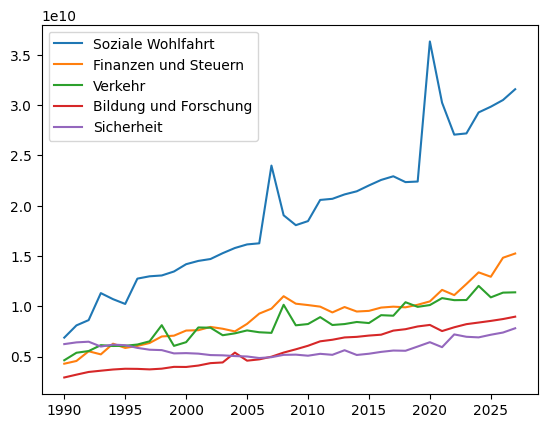

In [65]:
x = df_bundesfinanzen['Jahr']
plt.plot(x, df_bundesfinanzen['Soziale Wohlfahrt'], label='Soziale Wohlfahrt')
plt.plot(x, df_bundesfinanzen['Finanzen und Steuern'], label='Finanzen und Steuern')
plt.plot(x, df_bundesfinanzen['Verkehr'], label='Verkehr')
plt.plot(x, df_bundesfinanzen['Bildung und Forschung'], label='Bildung und Forschung')
plt.plot(x, df_bundesfinanzen['Sicherheit'], label='Sicherheit')
plt.legend()

plt.show()

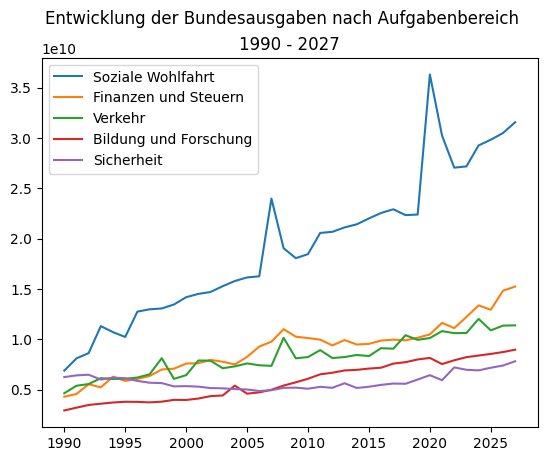

In [66]:
x = df_bundesfinanzen['Jahr']
plt.plot(x, df_bundesfinanzen['Soziale Wohlfahrt'], label='Soziale Wohlfahrt')
plt.plot(x, df_bundesfinanzen['Finanzen und Steuern'], label='Finanzen und Steuern')
plt.plot(x, df_bundesfinanzen['Verkehr'], label='Verkehr')
plt.plot(x, df_bundesfinanzen['Bildung und Forschung'], label='Bildung und Forschung')
plt.plot(x, df_bundesfinanzen['Sicherheit'], label='Sicherheit')
plt.suptitle('Entwicklung der Bundesausgaben nach Aufgabenbereich')
plt.title('1990 - 2027')
plt.legend()

plt.show()

In [67]:
def mia(x, pos):
    return f'{x/1e9:.1f} Mia'

print(mia(20_000_000_000, 0))

20.0 Mia


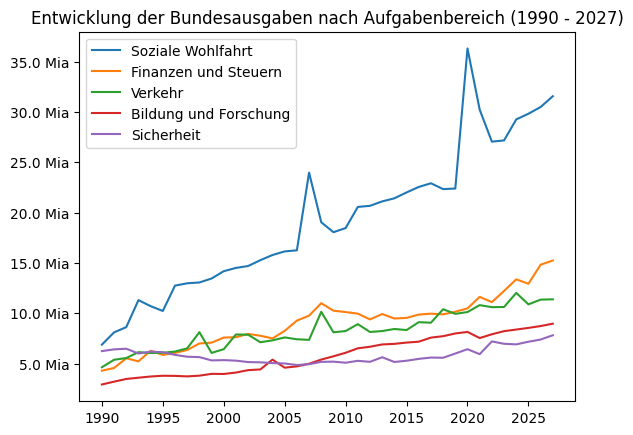

In [68]:
x = df_bundesfinanzen['Jahr']
fig, ax = plt.subplots()
ax.plot(x, df_bundesfinanzen['Soziale Wohlfahrt'], label='Soziale Wohlfahrt')
ax.plot(x, df_bundesfinanzen['Finanzen und Steuern'], label='Finanzen und Steuern')
ax.plot(x, df_bundesfinanzen['Verkehr'], label='Verkehr')
ax.plot(x, df_bundesfinanzen['Bildung und Forschung'], label='Bildung und Forschung')
ax.plot(x, df_bundesfinanzen['Sicherheit'], label='Sicherheit')
ax.set_title('Entwicklung der Bundesausgaben nach Aufgabenbereich (1990 - 2027)')

ax.yaxis.set_major_formatter(FuncFormatter(mia))

plt.legend()

plt.show()

### Relative Veränderung

In [69]:
df_bundesfinanzen['Total'] = df_bundesfinanzen['Bildung und Forschung'] + df_bundesfinanzen['Finanzen und Steuern'] + df_bundesfinanzen['Sicherheit'] + df_bundesfinanzen['Soziale Wohlfahrt'] + df_bundesfinanzen['Verkehr']
total = df_bundesfinanzen['Total']
df_bundesfinanzen['Bildung%'] = df_bundesfinanzen['Bildung und Forschung'] / total * 100
df_bundesfinanzen['Finanzen%'] = df_bundesfinanzen['Finanzen und Steuern'] / total * 100
df_bundesfinanzen['Sicherheit%'] = df_bundesfinanzen['Sicherheit'] / total * 100
df_bundesfinanzen['Soziales%'] = df_bundesfinanzen['Soziale Wohlfahrt'] / total * 100
df_bundesfinanzen['Verkehr%'] = df_bundesfinanzen['Verkehr'] / total * 100
print(df_bundesfinanzen.head())

   Jahr  Bildung und Forschung  Finanzen und Steuern    Sicherheit  \
0  1990           2.915631e+09          4.284407e+09  6.232319e+09   
1  1991           3.196256e+09          4.556436e+09  6.403684e+09   
2  1992           3.463842e+09          5.520356e+09  6.469725e+09   
3  1993           3.588631e+09          5.211826e+09  5.989260e+09   
4  1994           3.708234e+09          6.271460e+09  6.180145e+09   

   Soziale Wohlfahrt       Verkehr         Total   Bildung%  Finanzen%  \
0       6.875148e+09  4.626737e+09  2.493424e+10  11.693280  17.182825   
1       8.091567e+09  5.372566e+09  2.762051e+10  11.572039  16.496568   
2       8.615627e+09  5.541553e+09  2.961110e+10  11.697781  18.642859   
3       1.129834e+10  6.127085e+09  3.221514e+10  11.139577  16.178188   
4       1.069757e+10  6.044093e+09  3.290150e+10  11.270711  19.061318   

   Sicherheit%  Soziales%   Verkehr%  
0    24.995020  27.573119  18.555758  
1    23.184526  29.295503  19.451364  
2    21.848983  2

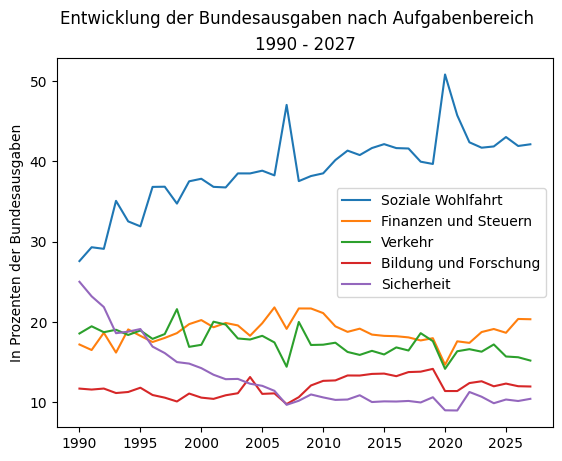

In [70]:
x = df_bundesfinanzen['Jahr']
plt.plot(x, df_bundesfinanzen['Soziales%'], label='Soziale Wohlfahrt')
plt.plot(x, df_bundesfinanzen['Finanzen%'], label='Finanzen und Steuern')
plt.plot(x, df_bundesfinanzen['Verkehr%'], label='Verkehr')
plt.plot(x, df_bundesfinanzen['Bildung%'], label='Bildung und Forschung')
plt.plot(x, df_bundesfinanzen['Sicherheit%'], label='Sicherheit')
plt.suptitle('Entwicklung der Bundesausgaben nach Aufgabenbereich')
plt.title('1990 - 2027')
plt.ylabel('In Prozenten der Bundesausgaben')
plt.legend()

plt.show()

In [76]:
print(labels)

['Bildung und Forschung', 'Finanzen und Steuern', 'Sicherheit', 'Soziale Wohlfahrt', 'Verkehr', 'Total', 'Bildung%', 'Finanzen%', 'Sicherheit%', 'Soziales%', 'Verkehr%']


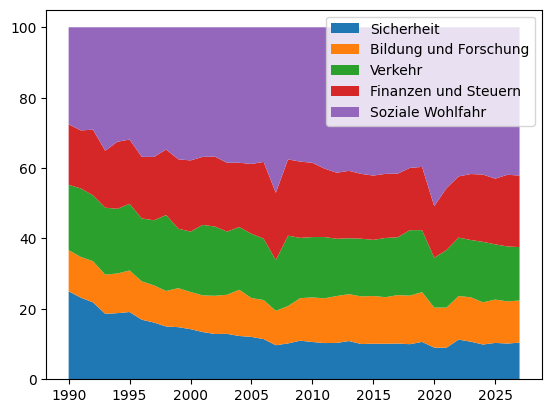

In [84]:

x = df_bundesfinanzen['Jahr']
y1 = df_bundesfinanzen['Soziales%'].tolist()
y2 = df_bundesfinanzen['Finanzen%'].tolist()
y3 = df_bundesfinanzen['Verkehr%'].tolist()
y4 = df_bundesfinanzen['Bildung%'].tolist()
y5 = df_bundesfinanzen['Sicherheit%'].tolist()

plt.stackplot(x, y5, y4, y3, y2, y1,
              labels = ['Sicherheit', 
                        'Bildung und Forschung', 
                        'Verkehr', 
                        'Finanzen und Steuern', 
                        'Soziale Wohlfahr'])
plt.legend()

plt.show()


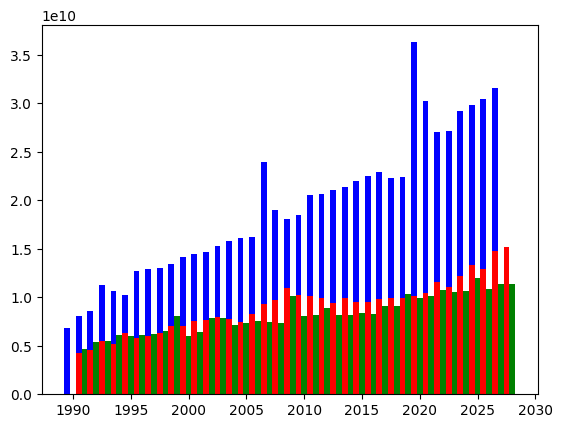

In [10]:
ax = plt.subplot(111)
x = df_bundesfinanzen['Jahr']
w = 0.5
ax.bar(x-w, df_bundesfinanzen['Soziale Wohlfahrt'], 
       width=w, color='b', align='center')
ax.bar(x+w, df_bundesfinanzen['Finanzen und Steuern'], 
       width=w, color='r', align='center')
ax.bar(x+2*w, df_bundesfinanzen['Verkehr'], 
       width=w, color='g', align='center')


plt.show()

In [45]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Sicherheit 1990", "A2", "Sicherheit 2000", "B2", "Sicherheit 2010", "C2"]
      
    ),
    link = dict(
      source = [0, 0, 1, 2, 3, 3], 
      target = [2, 3, 3, 4, 4, 5],
      value =  [8, 2, 4, 8, 4, 2],

  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10,width=600, height=400)
fig.show()

## Zusammenhänge

* Scatterplot